In [1]:
import gc
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
loandata = pd.read_csv("./training set/ts_label.csv")


In [3]:
X = loandata.drop("target", axis = 1)
y = loandata[["target"]] 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [4]:
#init classifier
mlp = MLPClassifier(hidden_layer_sizes=(2,10,10), alpha=1e-4,\
                    solver='sgd', verbose=True, tol=1e-4, random_state=1,\
                    learning_rate_init=.1,)

In [5]:
#train
mlp.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 12.19222192
Iteration 2, loss = 11.74005205
Iteration 3, loss = 11.30186669
Iteration 4, loss = 10.88048885
Iteration 5, loss = 10.47528116
Iteration 6, loss = 10.08561820
Iteration 7, loss = 9.71090730
Iteration 8, loss = 9.35057679
Iteration 9, loss = 9.00407032
Iteration 10, loss = 8.67085465
Iteration 11, loss = 8.35042393
Iteration 12, loss = 8.04229399
Iteration 13, loss = 7.74597896
Iteration 14, loss = 7.46103523
Iteration 15, loss = 7.18702558
Iteration 16, loss = 6.92352579
Iteration 17, loss = 6.67013930
Iteration 18, loss = 6.42648187
Iteration 19, loss = 6.19216573
Iteration 20, loss = 5.96684373
Iteration 21, loss = 5.75016121
Iteration 22, loss = 5.54179931
Iteration 23, loss = 5.34142477
Iteration 24, loss = 5.14874612
Iteration 25, loss = 4.96345183
Iteration 26, loss = 4.78526679
Iteration 27, loss = 4.61392467
Iteration 28, loss = 4.44915558
Iteration 29, loss = 4.29070566
Iteration 30, loss = 4.13833799
Iteration 31, loss = 3.99181485
Iteration 3

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 10, 10), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [14]:
predictions = mlp.predict(X_test)

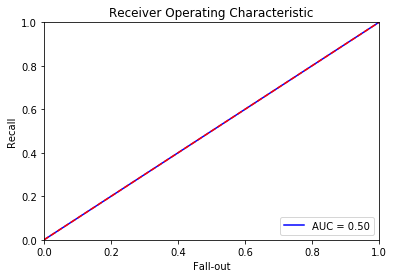

In [9]:
#roc
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions)
roc_auc=auc(false_positive_rate,recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [18]:
#score = clf.score(X_test, y_test)
scores = cross_val_score(mlp,y_test,predictions,cv=2,scoring='precision')
print ('Accuracy：', np.mean(predictions), scores)

Iteration 1, loss = 0.00010470
Iteration 2, loss = 0.00000700
Iteration 3, loss = 0.00000676
Iteration 4, loss = 0.00000662
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.00010470
Iteration 2, loss = 0.00000700
Iteration 3, loss = 0.00000676
Iteration 4, loss = 0.00000662
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Accuracy： 0.0 [ 0.  0.]


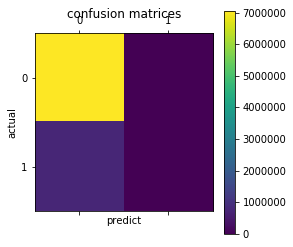

In [19]:
#confusion matrix
confusion_matrix=confusion_matrix(y_test,predictions)
plt.matshow(confusion_matrix)
plt.title('confusion matrices')
plt.colorbar()
plt.ylabel('actual')
plt.xlabel('predict')
plt.show()